In [160]:
import numpy as np
import matplotlib
import pandas as pd
import os
import re

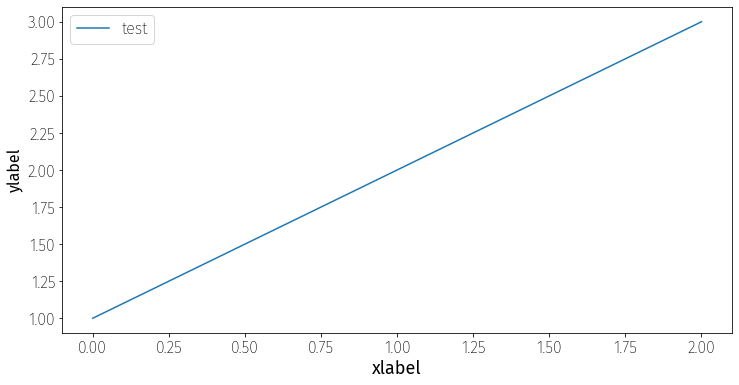

In [161]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Fira Sans']
plt.rcParams['font.weight'] = 'light'
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12,6))
ax.plot([1, 2, 3], label='test')

ax.legend()
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
plt.show()

In [162]:
data = pd.read_csv("/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-05_Skedoodle/t2=Inf/data.csv")

In [163]:
np.asarray(data.vx)

array([-2.87007410e-14,  3.32698816e-09,  1.33354708e-08, ...,
        2.04623832e-01,  2.04444220e-01,  2.04265029e-01])

# HHG Spectra

## Old ones

In [212]:
hanning = matplotlib.mlab.window_hanning

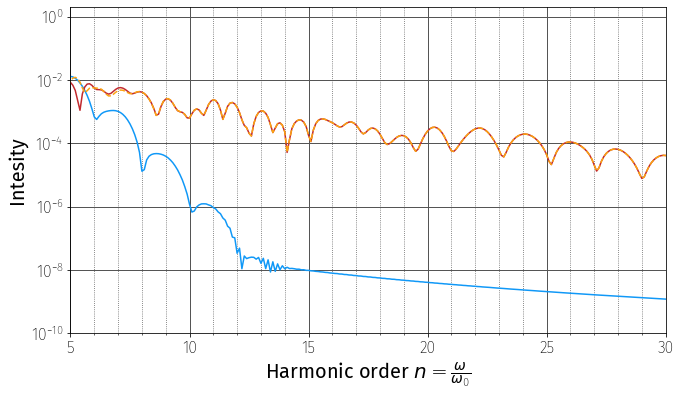

In [213]:
dt=0.001
fig = plt.figure(figsize=(16./1.5,9./1.5))
ax  = fig.add_subplot(1,1,1)
ax.set_facecolor((0,0,0,0))
fig.set_facecolor((0,0,0,0))
ax.magnitude_spectrum(data.vx,Fs=1/dt,window=hanning,color='#1098F7')
ax.magnitude_spectrum(data.vxinter,Fs=1/dt,window=hanning,color='#C1292E')
ax.magnitude_spectrum(data.vxintra,Fs=1/dt,window=hanning,color='#FCA311',linestyle='dashed')
plt.yscale('log')
ax.grid(which='major', color='#555555', linewidth=1.0)
ax.grid(which='minor', color='#555555', linewidth=0.8, linestyle=':')
ax.minorticks_on()
ax.set_xlabel(r'Harmonic order $n =\frac{\omega}{\omega_0}$',fontsize=20)
ax.set_ylabel('Intesity',fontsize=20)
ax.set_xlim((5,30))
ax.set_ylim((1e-10,2))
fig.savefig("vx_spectrum_2_new.svg")

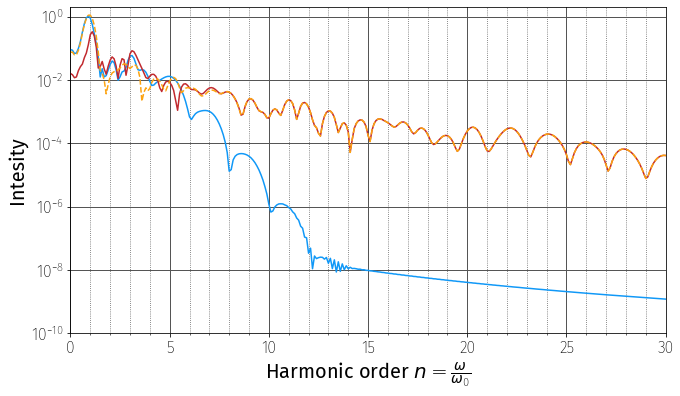

In [214]:
dt=0.001
fig = plt.figure(figsize=(16./1.5,9./1.5))
ax  = fig.add_subplot(1,1,1)
ax.set_facecolor((0,0,0,0))
fig.set_facecolor((0,0,0,0))
ax.magnitude_spectrum(data.vx,Fs=1/dt,window=hanning,color='#1098F7')
ax.magnitude_spectrum(data.vxinter,Fs=1/dt,window=hanning,color='#C1292E')
ax.magnitude_spectrum(data.vxintra,Fs=1/dt,window=hanning,color='#FCA311',linestyle='dashed')
plt.yscale('log')
ax.grid(which='major', color='#555555', linewidth=1.0)
ax.grid(which='minor', color='#555555', linewidth=0.8, linestyle=':')
ax.minorticks_on()
ax.set_xlabel(r'Harmonic order $n =\frac{\omega}{\omega_0}$',fontsize=20)
ax.set_ylabel('Intesity',fontsize=20)
ax.set_xlim((0,30))
ax.set_ylim((1e-10,2))
fig.savefig("vx_spectrum_2.svg")

In [7]:
def find_files(directory, filename):
    """
    Recursively searches a directory and all its subdirectories for a file with a given name.
    Returns a list of all matching file paths.
    """
    matches = []
    
    # Walk through the directory and its subdirectories
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == filename:
                matches.append(os.path.join(root, file))
    
    return matches

In [8]:
path2 = "/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-05_Skedoodle"

In [100]:
files = sorted(find_files(path2,"data.csv"))
files.reverse()

In [101]:
files

['/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-05_Skedoodle/t2=Inf/data.csv',
 '/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-05_Skedoodle/t2=4.499999999999999/data.csv',
 '/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-05_Skedoodle/t2=2.2499999999999996/data.csv',
 '/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-05_Skedoodle/t2=1.4999999999999998/data.csv',
 '/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-05_Skedoodle/t2=1.1249999999999998/data.csv',
 '/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-05_Skedoodle/t2=0.8999999999999998/data.csv',
 '/home/how09898/phd/data/hhgjl/tqt-compare/Ensemble[10](2d)GappedDirac_GaussianEPulse_t2_sweep_2024-02-05_Skedoodle

In [102]:
t2_list = [float(re.findall(r't2=(.*)/',f)[0]) for f in files]

In [103]:
t2_list

[inf,
 4.499999999999999,
 2.2499999999999996,
 1.4999999999999998,
 1.1249999999999998,
 0.8999999999999998,
 0.7499999999999999,
 0.6428571428571427,
 0.5624999999999999,
 0.4999999999999999]

In [104]:
t2s = ["{:.3g}".format(t2) for t2 in t2_list]
t2s

['inf', '4.5', '2.25', '1.5', '1.12', '0.9', '0.75', '0.643', '0.562', '0.5']

In [105]:
t2colors = plt.cm.viridis(np.linspace(0,1,len(t2s)))

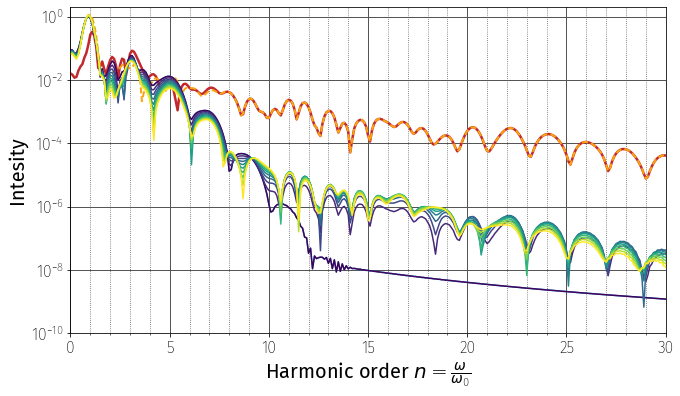

In [326]:
dt=0.001
fig = plt.figure(figsize=(16./1.5,9./1.5))
ax  = fig.add_subplot(1,1,1)
ax.set_facecolor((0,0,0,0))
fig.set_facecolor((0,0,0,0))
ax.magnitude_spectrum(data.vx,Fs=1/dt,window=hanning,color='#1098F7')
ax.magnitude_spectrum(data.vxinter,Fs=1/dt,window=hanning,color='#C1292E',linewidth=2.5)
ax.magnitude_spectrum(data.vxintra,Fs=1/dt,window=hanning,color='#FCA311',linestyle=(0, (3, 1.5)),linewidth=2)

lines = []

for f,t2,c in zip(files,t2s,t2colors):
    t2dat = pd.read_csv(f)
    l = ax.magnitude_spectrum(t2dat.vx,Fs=1/dt,window=hanning,color=c,label=r'$T_2 = $' + t2)
    lines.append(l[2])

plt.yscale('log')
ax.grid(which='major', color='#555555', linewidth=1.0)
ax.grid(which='minor', color='#555555', linewidth=0.8, linestyle=':')
ax.minorticks_on()
ax.set_xlabel(r'Harmonic order $n = \frac{\omega}{\omega_0}$',fontsize=20)
ax.set_ylabel('Intesity',fontsize=20)
ax.set_xlim((0,30))
# ax.legend(framealpha=1,loc='lower left')
ax.set_ylim((1e-10,2))
fig.savefig("vx_spectrum_2_sweep.svg")

In [153]:
figlegend = plt.figure(figsize=(3,9./1.5))
figlegend.legend(lines,[r'$T_2 = $' + x for x in t2s],framealpha=0,loc='center')
figlegend.savefig('legend.svg')

<Figure size 216x432 with 0 Axes>

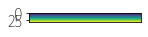

In [25]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(2,9./1.5))
ax  = fig.add_subplot(1,1,1)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.set_xticks([])
ax.imshow(gradient.T,cmap='viridis',aspect=0.1,extent=[80,120,32,0])
plt.show()

## New smaller ones (2D system)

In [170]:
leftdata = pd.read_csv('leftdata.csv')
rightdata = pd.read_csv('rightdata.csv')

In [ ]:
fs = 1 / 0.0025

In [189]:
np.arange(0,30,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

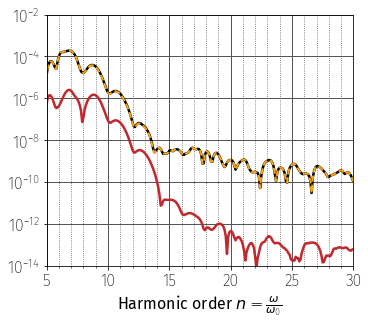

In [313]:
fig = plt.figure(figsize=(5.4,4.8))
ax  = fig.add_subplot(1,1,1)
ax.set_facecolor((0,0,0,0))
fig.set_facecolor((0,0,0,0))
ax.magnitude_spectrum(rightdata.vx,Fs=fs,window=hanning,color='black',linewidth=2.5)
ax.magnitude_spectrum(rightdata.vxintra,Fs=fs,window=hanning,color='#C1292E',linewidth=2.5)
ax.magnitude_spectrum(rightdata.vxinter,Fs=fs,window=hanning,color='#FCA311',linestyle=(0, (3, 1.5)),linewidth=2)
plt.yscale('log')
ax.grid(which='major', color='#555555', linewidth=1.0)
ax.grid(which='minor', color='#555555', linewidth=0.8, linestyle=':')
ax.set_xticks(np.arange(0,50,5), minor=False)
ax.set_xticks(np.arange(0,50,1), minor=True)
ax.set_xlabel(r'Harmonic order $n =\frac{\omega}{\omega_0}$',fontsize=16)
ax.set_ylabel(None)
ax.set_xlim((5,30))
ax.set_ylim((1e-14,1e-2))
plt.tight_layout()
fig.savefig("vx_spectrum_right.svg")

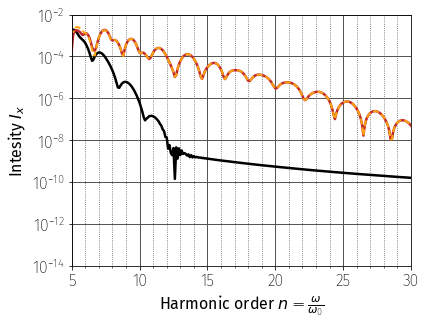

In [314]:
fig = plt.figure(figsize=(6.2,4.8))
ax  = fig.add_subplot(1,1,1)
ax.set_facecolor((0,0,0,0))
fig.set_facecolor((0,0,0,0))
ax.magnitude_spectrum(leftdata.vx,Fs=fs,window=hanning,color='black',linewidth=2.5)
ax.magnitude_spectrum(leftdata.vxintra,Fs=fs,window=hanning,color='#C1292E',linewidth=2.5)
ax.magnitude_spectrum(leftdata.vxinter,Fs=fs,window=hanning,color='#FCA311',linewidth=2,linestyle=(0, (3, 1.5)))
plt.yscale('log')
ax.grid(which='major', color='#555555', linewidth=1.0)
ax.grid(which='minor', color='#555555', linewidth=0.8, linestyle=':')
ax.set_xticks(np.arange(0,50,5), minor=False)
ax.set_xticks(np.arange(0,50,1), minor=True)
ax.set_xlabel(r'Harmonic order $n =\frac{\omega}{\omega_0}$',fontsize=16)
ax.set_ylabel(r'Intesity $I_x$',fontsize=16)
ax.set_xlim((5,30))
ax.set_ylim((1e-14,1e-2))
plt.tight_layout()
fig.savefig("vx_spectrum_left.svg")

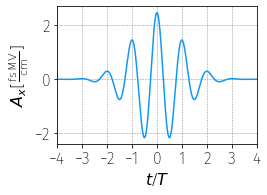

In [327]:
a_to_fsMVcm = 0.25464790894703254

ax_fsMV_per_cm = rightdata.ax * a_to_fsMVcm
fig = plt.figure(figsize=(4,3))
ax  = fig.add_subplot(1,1,1)
ax.set_facecolor((0,0,0,0))
fig.set_facecolor((0,0,0,0))

ax.plot(rightdata.t,ax_fsMV_per_cm,color='#1098F7')

ax.grid(which='major', color='#555555', linewidth=0.6, linestyle ='dotted')
ax.set_xticks(np.arange(-5,5,1), minor=False)
ax.set_xlabel(r'$t/T$',fontsize=16)
ax.set_ylabel(r'$A_x [\frac{\mathrm{fs\,MV}}{\mathrm{cm}}]$')
ax.set_xlim((-4,4))
# ax.set_ylim((1e-14,1e-2))
plt.tight_layout()
fig.savefig("Ax.svg")

<Figure size 360x360 with 0 Axes>

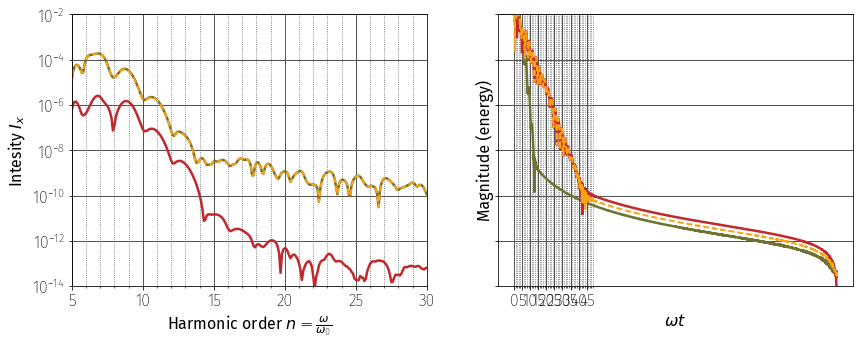

In [266]:
fig = plt.figure(figsize=(5,5))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
ax1.set_facecolor((0,0,0,0))
ax2.set_facecolor((0,0,0,0))
fig.set_facecolor((0,0,0,0))

ax1.magnitude_spectrum(rightdata.vx,Fs=fs,window=hanning,color='#6F732F',linewidth=2.5)
ax1.magnitude_spectrum(rightdata.vxintra,Fs=fs,window=hanning,color='#C1292E',linewidth=2.5)
ax1.magnitude_spectrum(rightdata.vxinter,Fs=fs,window=hanning,color='#FCA311',linewidth=2,linestyle=(0, (3, 1.5)))

ax2.magnitude_spectrum(leftdata.vx,Fs=fs,window=hanning,color='#6F732F',linewidth=2.5)
ax2.magnitude_spectrum(leftdata.vxintra,Fs=fs,window=hanning,color='#C1292E',linewidth=2.5)
ax2.magnitude_spectrum(leftdata.vxinter,Fs=fs,window=hanning,color='#FCA311',linestyle=(0, (3, 1.5)),linewidth=2)

plt.yscale('log')

ax1.grid(which='major', color='#555555', linewidth=1.0)
ax1.grid(which='minor', color='#555555', linewidth=0.8, linestyle=':')
ax1.set_xticks(np.arange(0,50,5), minor=False)
ax1.set_xticks(np.arange(0,50,1), minor=True)
ax1.set_xlabel(r'Harmonic order $n =\frac{\omega}{\omega_0}$',fontsize=16)
ax1.set_ylabel(r'Intesity $I_x$',fontsize=16)
ax1.set_xlim((5,30))
ax1.set_ylim((1e-14,1e-2))

ax2.grid(which='major', color='#555555', linewidth=1.0)
ax2.grid(which='minor', color='#555555', linewidth=0.8, linestyle=':')
ax2.set_xticks(np.arange(0,50,5), minor=False)
ax2.set_xticks(np.arange(0,50,1), minor=True)
ax2.set_xlabel(r'Harmonic order $n =\frac{\omega}{\omega_0}$',fontsize=16)
ax2.set_ylabel(None)
ax2.set_xlim((5,30))
ax2.set_ylim((1e-14,1e-2))
fig.savefig("vx_spectra_combined.svg")

# Ratio plots

In [26]:
ratiodata = pd.read_csv('ratios_m_zeta.csv')

In [27]:
zetas=list(set(ratiodata['zeta']))
ms=list(set(ratiodata['m']))

In [32]:
zetas

[1.0, 2.14, 3.29, 2.71, 1.57, 3.86, 4.43, 5.0]

In [46]:
ms

[1.0, 3.71, 6.43, 9.14, 11.9, 14.6, 17.3, 20.0]

In [54]:
np.asarray(ratiodata['zeta']).reshape((8,8)).T

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [1.57, 1.57, 1.57, 1.57, 1.57, 1.57, 1.57, 1.57],
       [2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14],
       [2.71, 2.71, 2.71, 2.71, 2.71, 2.71, 2.71, 2.71],
       [3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29],
       [3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86],
       [4.43, 4.43, 4.43, 4.43, 4.43, 4.43, 4.43, 4.43],
       [5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  ]])

In [59]:
np.flip(np.asarray(ratiodata['zeta']).reshape((8,8)).T,axis=0)

array([[5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  ],
       [4.43, 4.43, 4.43, 4.43, 4.43, 4.43, 4.43, 4.43],
       [3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86, 3.86],
       [3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29, 3.29],
       [2.71, 2.71, 2.71, 2.71, 2.71, 2.71, 2.71, 2.71],
       [2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14, 2.14],
       [1.57, 1.57, 1.57, 1.57, 1.57, 1.57, 1.57, 1.57],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]])

In [ ]:
np.flip(np.asarray(ratiodata['m']).reshape((8,8)).T,axis=0)

array([[ 1.  ,  3.71,  6.43,  9.14, 11.9 , 14.6 , 17.3 , 20.  ],
       [ 1.  ,  3.71,  6.43,  9.14, 11.9 , 14.6 , 17.3 , 20.  ],
       [ 1.  ,  3.71,  6.43,  9.14, 11.9 , 14.6 , 17.3 , 20.  ],
       [ 1.  ,  3.71,  6.43,  9.14, 11.9 , 14.6 , 17.3 , 20.  ],
       [ 1.  ,  3.71,  6.43,  9.14, 11.9 , 14.6 , 17.3 , 20.  ],
       [ 1.  ,  3.71,  6.43,  9.14, 11.9 , 14.6 , 17.3 , 20.  ],
       [ 1.  ,  3.71,  6.43,  9.14, 11.9 , 14.6 , 17.3 , 20.  ],
       [ 1.  ,  3.71,  6.43,  9.14, 11.9 , 14.6 , 17.3 , 20.  ]])

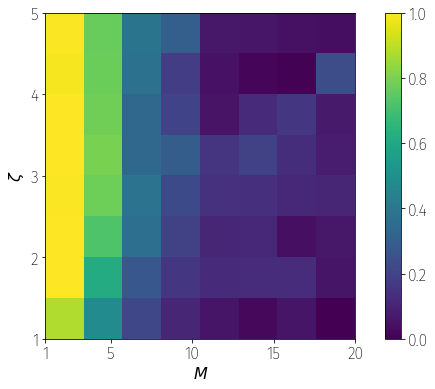

In [319]:
fig = plt.figure(figsize=(16./1.5,9./1.5))
ax  = fig.add_subplot(1,1,1)
ax.set_facecolor((0,0,0,0))
fig.set_facecolor((0,0,0,0))

ax.imshow(np.flip(np.asarray(ratiodata['interintra']).reshape((8,8)).T,axis=0),cmap='viridis_r',extent=[1,20,1,5],aspect=1/0.2)
ax.set_ylabel(r'$\zeta$')
ax.set_xlabel(r'$M$')
ax.set_xticks([1,5,10,15,20])
ax.set_yticks([1,2,3,4,5])
fig.colorbar(cm.ScalarMappable(cmap='viridis'), ax=ax)
plt.show()

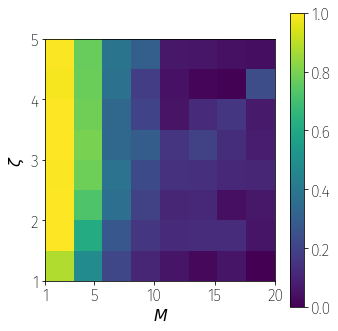

In [321]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(1,1,1)
ax.set_facecolor((0,0,0,0))
fig.set_facecolor((0,0,0,0))

ax.imshow(np.flip(np.asarray(ratiodata['interintra']).reshape((8,8)).T,axis=0),cmap='viridis_r',extent=[1,20,1,5],aspect=1/0.2)
ax.set_ylabel(r'$\zeta$')
ax.set_xlabel(r'$M$')
ax.set_xticks([1,5,10,15,20])
fig.colorbar(cm.ScalarMappable(cmap='viridis'), ax=ax)
plt.tight_layout()
fig.savefig("ratio_ra_er.svg")

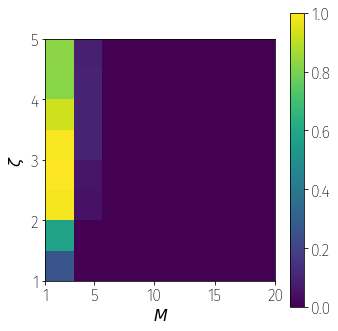

In [323]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(1,1,1)
ax.set_facecolor((0,0,0,0))
fig.set_facecolor((0,0,0,0))

ax.imshow(np.flip(np.asarray(ratiodata['intertot']).reshape((8,8)).T,axis=0),cmap='viridis',extent=[1,20,1,5],aspect=1/0.2)
ax.set_ylabel(r'$\zeta$')
ax.set_xlabel(r'$M$')
ax.set_xticks([1,5,10,15,20])
fig.colorbar(cm.ScalarMappable(cmap='viridis'), ax=ax)
plt.tight_layout()
fig.savefig("ratio_er_tot.svg")